In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# import data and turn into DF
df = pd.read_excel("train.xlsx")

In [4]:
df.head()   

,PRICES,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
0,2007-01-01,24.31,24.31,21.71,8.42,0.01,0.01,0.02,0.01,0.01,...,15.00,10.00,8.17,27.77,37.99,33.11,37.99,33.00,36.48,30.65
1,2007-01-02,16.01,11.00,9.01,7.50,9.00,7.45,16.50,28.01,29.96,...,37.57,36.45,37.99,53.00,59.69,50.09,50.00,36.22,31.09,29.84
2,2007-01-03,28.00,24.50,24.15,18.99,15.50,23.11,29.01,39.73,43.81,...,43.21,43.99,48.00,57.00,60.99,55.51,51.77,34.51,39.31,38.05
3,2007-01-04,31.01,28.69,27.00,24.20,12.02,27.00,28.00,34.85,41.31,...,40.01,38.00,42.66,53.00,58.99,53.50,44.01,35.00,34.46,31.57
4,2007-01-05,22.00,19.50,17.55,15.91,11.40,22.65,27.30,34.00,40.01,...,40.06,38.00,38.61,49.84,53.00,45.91,36.74,29.61,30.61,27.51


In [5]:
df = df.rename(columns={"PRICES" : "date"})
df.columns

Index(['date', 'Hour 01', 'Hour 02', 'Hour 03', 'Hour 04', 'Hour 05',
       'Hour 06', 'Hour 07', 'Hour 08', 'Hour 09', 'Hour 10', 'Hour 11',
       'Hour 12', 'Hour 13', 'Hour 14', 'Hour 15', 'Hour 16', 'Hour 17',
       'Hour 18', 'Hour 19', 'Hour 20', 'Hour 21', 'Hour 22', 'Hour 23',
       'Hour 24'],
      dtype='object')

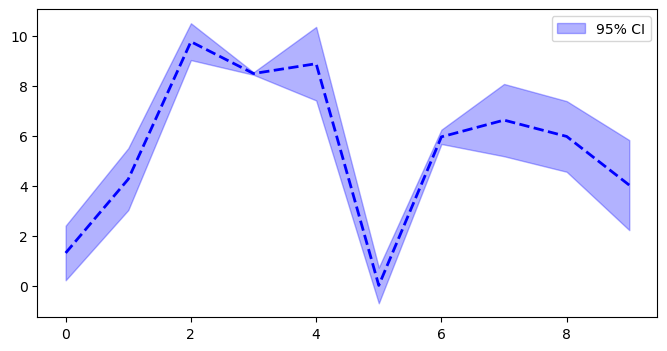

In [6]:
x = np.arange(10)  # X-axis (numeric)
y = np.random.rand(10) * 10  # Mean values
s = np.random.rand(10)  # Standard deviation

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, linestyle="--", linewidth=2, color="b")
ax.fill_between(x, y - s * 1.96, y + s * 1.96, alpha=0.3, color="b", label="95% CI")
plt.legend()
plt.show()

In [11]:
data = df[(df["date"].dt.month == 12) & (df["date"].dt.year == 2007)]
mean = data.mean(axis = 0)
std = data.std(axis = 0)



### Some plots for Intuition

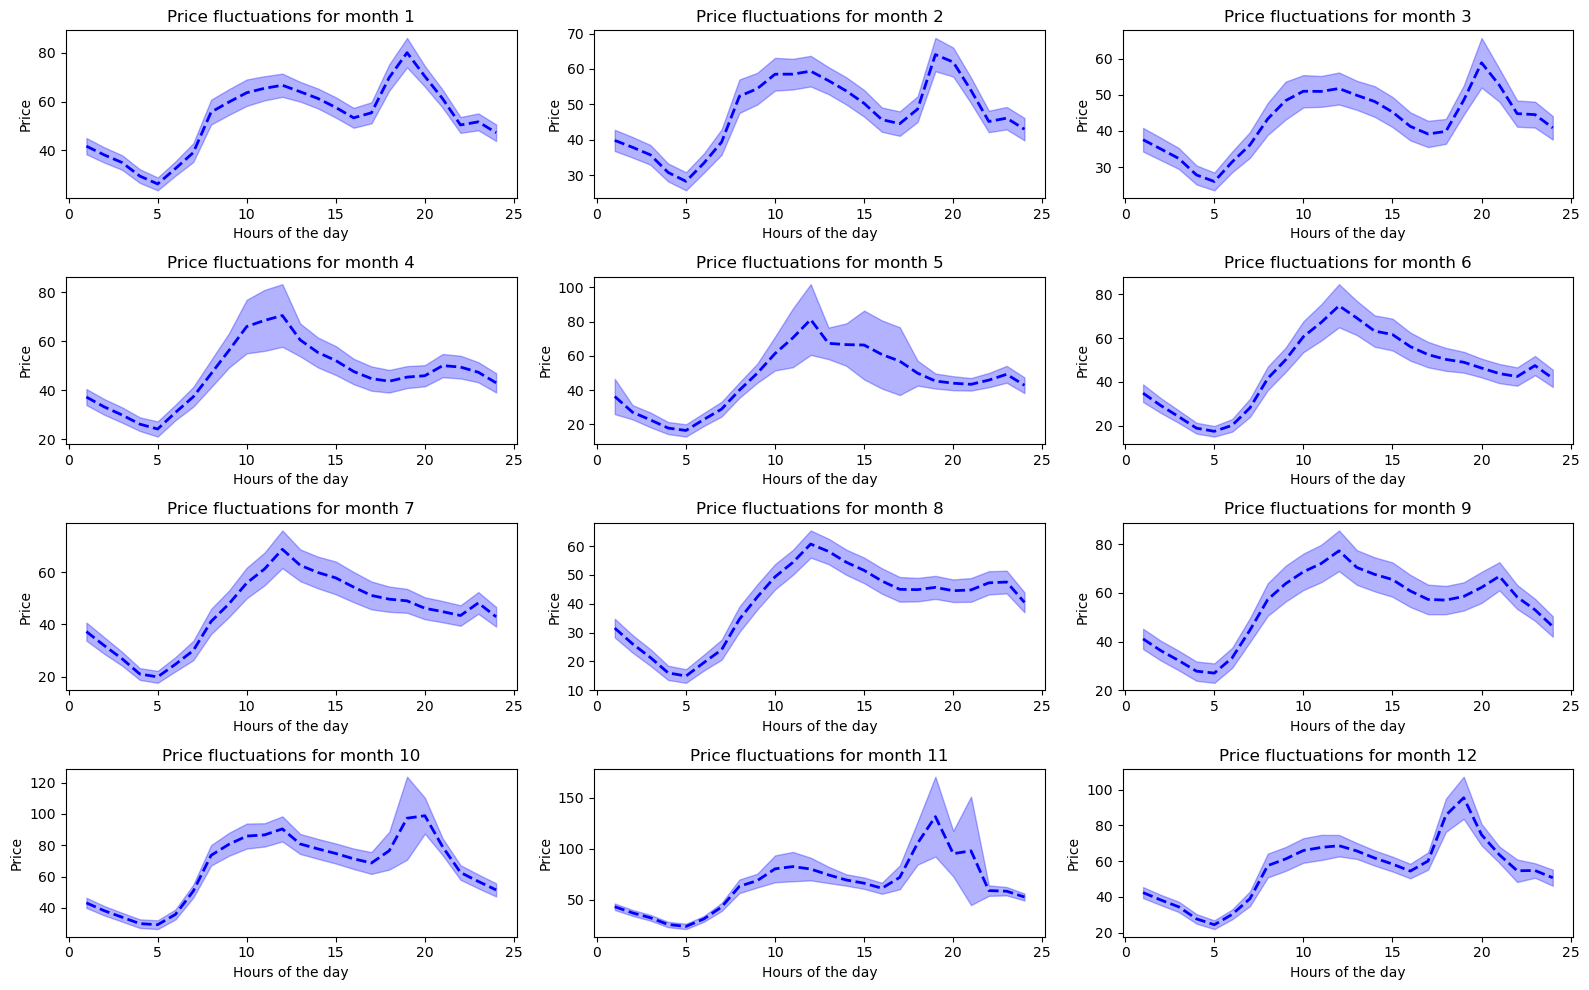

In [12]:
row, col = 0, 0
fig, axes = plt.subplots(4, 3, figsize=(16, 10)) 

for month in range(1, 13):
    
    # extract data 
    data = df[(df["date"].dt.month == month)]
    mean = data.mean(axis = 0)
    std = data.std(axis = 0)

    # get usable data 
    mval, idx = np.array(mean.values[1:], dtype = float), mean.index[1:]
    idx = np.array([int((h.replace("Hour ", ""))) for h in idx])
    sval = np.array(std.values[1:], dtype=float)
    # # #draw line plot 
    label = f"Price fluctuations for month {month}"
    axes[row, col].plot(idx, mval, linestyle = "--", linewidth = 2, color = "b")
    axes[row, col].fill_between(idx, mval - sval*1.96/(np.sqrt(len(data))), mval + sval*1.96/(np.sqrt(len(data))),
                            alpha = 0.3, color = "b", label = "95% CI") 
    axes[row, col].set_xlabel("Hours of the day")
    axes[row, col].set_ylabel("Price")
    axes[row, col].set_title(label)
    
    
    # update row, column values 
    col += 1 
    if col == 3:
        col = 0 
        row += 1

plt.tight_layout()
plt.show()
        

In [13]:
days = df[(df["date"].dt.month == 12) & (df["date"].dt.year == 2007)]
# for day, row in days.iterrows():
#     print(day, row)
day1 = days.iloc[0, 1:]
print(np.argmax(day1) + 1, np.max(day1))
day1

19 87.94


Hour 01    62.19
Hour 02     48.1
Hour 03     43.4
Hour 04    29.99
Hour 05    18.08
Hour 06    37.92
Hour 07     30.0
Hour 08    57.03
Hour 09    48.86
Hour 10    56.84
Hour 11     63.8
Hour 12    63.34
Hour 13    65.23
Hour 14    63.79
Hour 15    60.82
Hour 16    49.96
Hour 17    45.41
Hour 18     78.0
Hour 19    87.94
Hour 20    75.94
Hour 21    49.94
Hour 22    47.87
Hour 23    49.87
Hour 24    48.11
Name: 334, dtype: object

In [14]:
days.mean(axis= 0)

date       2007-12-16 00:00:00
Hour 01              47.098387
Hour 02              42.117742
Hour 03              37.775484
Hour 04                  29.93
Hour 05              25.005484
Hour 06               33.35871
Hour 07              43.004839
Hour 08              69.077097
Hour 09              75.773226
Hour 10              82.267097
Hour 11              85.031935
Hour 12              84.082258
Hour 13              78.052903
Hour 14              72.365161
Hour 15              67.775484
Hour 16              64.006129
Hour 17              71.370968
Hour 18             110.534516
Hour 19             126.056774
Hour 20              93.240323
Hour 21              78.502903
Hour 22                  70.84
Hour 23              65.993548
Hour 24              61.747097
dtype: object

In [15]:
df["date"].dt.year.unique()

array([2007, 2008, 2009])

In [26]:
min_prices = {2007:{}, 2008:{}, 2009: {}}
max_prices = {2007:{}, 2008:{}, 2009: {}}

for year in min_prices.keys():
    # loop over the months
    for month in range(1, 13):
        # create month list 
        min_prices[year][month] = []
        max_prices[year][month] = []
        # generate moth df
        month_df = df[(df["date"].dt.year == year) & (df["date"].dt.month == month)]
        # get number of days in moth 
        n_days = len(month_df["date"])
        # loop over the days 
        for day in range(n_days):
            # day prices
            dp = month_df.iloc[day, 1:]
            dmax = (np.argmax(dp) + 1, np.max(dp))
            dmin = (np.argmin(dp) + 1, np.min(dp))
            # log data 
            min_prices[year][month].append(dmin)
            max_prices[year][month].append(dmax)

In [27]:
min_prices

{2007: {1: [(5, 0.01),
   (6, 7.45),
   (5, 15.5),
   (5, 12.02),
   (5, 11.4),
   (5, 16.95),
   (5, 8.0),
   (4, 3.4),
   (5, 8.17),
   (5, 11.26),
   (5, 8.18),
   (5, 9.07),
   (5, 1.04),
   (4, 0.01),
   (4, 17.4),
   (5, 17.1),
   (5, 11.01),
   (5, 12.51),
   (5, 9.72),
   (5, 8.0),
   (4, 0.01),
   (4, 9.18),
   (5, 23.64),
   (5, 26.99),
   (5, 26.8),
   (5, 28.0),
   (5, 19.0),
   (5, 26.0),
   (5, 15.66),
   (5, 20.01),
   (5, 16.79)],
  2: [(5, 23.2),
   (5, 19.59),
   (5, 10.6),
   (7, 17.95),
   (5, 19.12),
   (5, 23.59),
   (5, 26.7),
   (5, 22.5),
   (5, 20.11),
   (5, 15.79),
   (7, 5.51),
   (5, 8.17),
   (5, 15.35),
   (4, 17.19),
   (4, 15.99),
   (5, 19.18),
   (7, 8.16),
   (7, 7.84),
   (5, 12.54),
   (5, 18.2),
   (5, 11.94),
   (5, 17.15),
   (5, 16.0),
   (7, 13.08),
   (8, 5.95),
   (4, 12.08),
   (5, 15.95),
   (5, 11.05)],
  3: [(5, 7.97),
   (5, 8.07),
   (7, 12.09),
   (8, 9.18),
   (4, 9.17),
   (5, 12.0),
   (5, 9.0),
   (4, 14.08),
   (5, 16.23),
   (5

In [28]:
# test 
print(f"Min price Dec. 12 2007: {min_prices[2007][12][12 -1][1]} at hour {min_prices[2007][12][12 -1][0]}")
print(f"Max price Dec. 12 2007: {max_prices[2007][12][12 -1][1]} at hour {max_prices[2007][12][12 -1][0]}")


Min price Dec. 12 2007: 28.16 at hour 5
Max price Dec. 12 2007: 191.99 at hour 18


Basic heuristc where depending on the day month and year you have a certain buy and sell signal 

In [40]:
heur1 = {month: {} for month in range(1, 13)}
for month in range(1, 13):
    for year in [2007, 2008, 2009]:
        n_days = len(min_prices[year][month])
        for day in range(n_days):
            if day + 1 not in heur1[month]:
                heur1[month][day + 1] = {"sell": None , "buy": None}
            # Extract max and min values 
            max_hour, max_price = max_prices[year][month][day]
            min_hour, min_price = min_prices[year][month][day]
            # update buy/sell values 
            if heur1[month][day + 1]["sell"] is None or max_price > heur1[month][day + 1]["sell"][1]:
                heur1[month][day + 1]["sell"] = (max_hour, max_price)
            if heur1[month][day + 1]["buy"] is None or min_price < heur1[month][day + 1]["buy"][1]:
                heur1[month][day + 1]["buy"] = (min_hour, min_price)
    # # extract minimum values and maximum values
    # for day in range(n_days):
    #     heur1[month][day + 1]["sell"] = max(heur1[month][day + 1]["sell"])
    #     heur1[month][day + 1]["buy"] = min(heur1[month][day + 1]["buy"])

In [41]:
heur2 = {month: {} for month in range(1, 13)}
for month in range(1, 13):
    for year in [2007, 2008, 2009]:
        n_days = len(min_prices[year][month])
        for day in range(n_days):

            if day + 1 not in heur1[month]:
                heur1[month][day + 1] = {"sell": [] , "buy": []}

            # Extract max and min values 
            max_hp = max_prices[year][month][day]
            min_hp = min_prices[year][month][day]
            # update buy/sell values 
            heur2[month][day + 1]["sell"].append(max_hp[0])
            heur2[month][day + 1]["buy"].append(min_hp[0])

KeyError: 1

In [66]:
import sys
heurist = {month: {} for month in range(1, 13)}
# loop over the months
for month in range(1, 13):
    # generate moth df
    month_df = df[(df["date"].dt.month == month)]
    # get number of days in moth 
    n_days = len(month_df["date"])

    # loop over the days 
    for day in range(n_days):
        # create dictionaries for each day
        heurist[month][day + 1] = []

        # greate day data frame averages
        day_df = df[(df["date"].dt.month == month) & df["date"].dt.day == day + 1]
        print(day_df)

        # extract the hours with lowest averages
        while len(heurist[month][day + 1]) != 12:
            print(len(heurist[month][day + 1]))
            # extract minimal value
            min = day_df.values[1:].min()
            # extract index of minimal hour
            idx = day_df[day_df == min].index
            print(idx)
            # append hour of m
            heurist[month][day + 1].append(int(idx[0].replace("Hour ", "")))
            # remove hour from df
            day_df = day_df.drop(idx)
        
        # sort data ascendingly 
        heurist[month][day + 1].sort()
        print("sorted and onto the next")

          date  Hour 01  Hour 02  Hour 03  Hour 04  Hour 05  Hour 06  Hour 07  \
0   2007-01-01    24.31    24.31    21.71     8.42     0.01     0.01     0.02   
2   2007-01-03    28.00    24.50    24.15    18.99    15.50    23.11    29.01   
4   2007-01-05    22.00    19.50    17.55    15.91    11.40    22.65    27.30   
6   2007-01-07    22.00    18.29    16.59     9.17     8.00     8.19     9.01   
8   2007-01-09    18.51    16.81    13.01    10.01     8.17    16.00    26.00   
10  2007-01-11    15.40    16.71    14.80     9.50     8.18    15.50    22.91   
12  2007-01-13    23.00    21.00    16.00    11.60     1.04    10.01    13.00   
14  2007-01-15    23.07    22.42    21.84    17.40    21.00    24.00    27.00   
16  2007-01-17    20.00    19.00    18.00    13.68    11.01    16.01    22.01   
18  2007-01-19    15.21    12.15    12.01    10.31     9.72    17.49    29.29   
20  2007-01-21     8.01     8.31     7.21     0.01     5.11     8.31     2.01   
22  2007-01-23    30.81    2

TypeError: '<=' not supported between instances of 'Timestamp' and 'float'

In [49]:
# Example data as a list
data = [3, 1, 4, 1, 5, 9, 2]

# Convert the list to a Pandas Series
data_series = pd.Series(data)

# Now we can use idxmin() correctly
min_index = data_series.idxmin()
print("Index of minimum value:", min_index)

Index of minimum value: 1


In [68]:
for year in [2007, 2008, 2009]:
    print(min_prices[year][1][1])

(6, 7.45)
(4, 36.0)
(5, 22.99)


In [13]:
q = df[(df["date"].dt.year == 2007) & (df["date"].dt.month == 12) & (df["date"].dt.day == 12)]
q

,date,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
345,2007-12-12,43.02,36.26,35.22,28.9,28.16,34.4,56.0,98.71,98.7,...,91.59,89.92,100.0,191.99,182.76,109.0,86.99,73.03,78.25,66.03
